# import

In [1]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.0.0-alpha0'

# データの読み込み

In [2]:
# MNIST データのロード
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
# 0 - 255の画素データを 0.0 - 1.0に変換
x_train = x_train / 255.0
x_test = x_test / 255.0

# 2次元画素データを1次元に変換
x_train = x_train.reshape(-1, 784) 
x_test = x_test.reshape(-1, 784)

# one-hotベクトル化
y_train = keras.utils.to_categorical(y_train, 10) 
y_test = keras.utils.to_categorical(y_test, 10)

# モデルの構築

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation=tf.nn.relu, input_shape=(784,)),
    Dense(10, activation=tf.nn.softmax)
])

# コンパイル

In [5]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.5),
              loss='mean_squared_error',
              metrics=['accuracy'])

# モデルの可視化

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


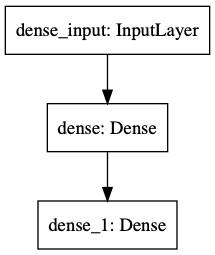

In [7]:
keras.utils.plot_model(model)

# モデルの保存

In [8]:
model_json_str = model.to_json()
open('model.json', 'w').write(model_json_str)
model.save_weights('weights.h5');

# Callbackの定義

In [9]:
tb_cb = keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1, write_graph=True, write_images=True)

In [10]:
if tf.__version__[0]=='1':
    sv_cb = keras.callbacks.ModelCheckpoint(
        filepath = 'save/ckpt/model',
        monitor='val_loss',
        verbose=0,
        save_best_only=False,
        save_weights_only=True,
        mode='auto',
        save_freq=1
    )
else:
    sv_cb = keras.callbacks.ModelCheckpoint(
        filepath = 'save/ckpt/model',
        monitor='val_loss',
        verbose=0,
        save_best_only=False,
        save_weights_only=True,
        mode='auto',
        period=1   # tf2ではsave_freqではなくperiod
    )

# 訓練

In [11]:
EPOCHS = 15

In [12]:
model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, callbacks=[tb_cb, sv_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0260 - accuracy: 0.8368 - val_loss: 0.0135 - val_accuracy: 0.9131
Epoch 2/15
48000/48000 [==============================] - 2s 44us/sample - loss: 0.0128 - accuracy: 0.9199 - val_loss: 0.0110 - val_accuracy: 0.9298
Epoch 3/15
48000/48000 [==============================] - 2s 43us/sample - loss: 0.0107 - accuracy: 0.9330 - val_loss: 0.0096 - val_accuracy: 0.9385
Epoch 4/15
48000/48000 [==============================] - 2s 47us/sample - loss: 0.0094 - accuracy: 0.9414 - val_loss: 0.0088 - val_accuracy: 0.9453
Epoch 5/15
48000/48000 [==============================] - 2s 52us/sample - loss: 0.0084 - accuracy: 0.9483 - val_loss: 0.0081 - val_accuracy: 0.9499
Epoch 6/15
48000/48000 [==============================] - 3s 55us/sample - loss: 0.0076 - accuracy: 0.9528 - val_loss: 0.0077 - val_accuracy: 0.9528
Epoch 7/15
48000/48000 [==============================] 

# 評価

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.0053 - accuracy: 0.9661


In [14]:
print(test_loss)
print(test_acc)

0.005283238546738358
0.9661


In [15]:
model.predict(x_test[:10])

array([[1.13894544e-04, 1.09406081e-07, 1.35339762e-03, 2.10267142e-03,
        1.03226364e-06, 1.04147321e-05, 1.72349139e-08, 9.94274199e-01,
        6.70264766e-04, 1.47404626e-03],
       [1.26996383e-04, 1.32762170e-05, 9.95943367e-01, 2.18479265e-03,
        2.39965853e-10, 2.97697465e-04, 1.33956654e-03, 6.37791153e-10,
        9.42959887e-05, 3.65328934e-10],
       [9.47649532e-05, 9.60107625e-01, 8.84061120e-03, 2.28596758e-03,
        1.49286585e-03, 1.87130400e-03, 1.08775971e-02, 7.32640596e-03,
        6.79036323e-03, 3.12477350e-04],
       [9.99326587e-01, 5.97891940e-08, 1.76789054e-05, 2.05286187e-06,
        1.14475306e-07, 1.66285477e-04, 4.40816482e-04, 3.97517106e-05,
        9.99483746e-07, 5.63913181e-06],
       [4.85207092e-05, 2.13127696e-05, 1.22545738e-04, 4.47056163e-06,
        9.74602222e-01, 3.89560410e-05, 2.05958582e-04, 1.04386231e-03,
        1.21126461e-04, 2.37908568e-02],
       [7.29878275e-06, 9.91260469e-01, 8.01069255e-04, 5.69401542e-04,
   

# savedmodel

In [16]:
import os

if tf.__version__[0]=='1':

    sess = keras.backend.get_session()
    tf.saved_model.simple_save(
        sess,
        os.path.join("save", "savedmodel/1"),
                     inputs={'inputs': model.input}, 
                     outputs={t.name: t for t in model.outputs}

    )

In [17]:
keras.experimental.export_saved_model(model, "./save/experimental")

W0520 12:55:57.483618 4505105856 deprecation.py:323] From /Users/ootayukinori/work/python/env/tf20a/lib/python3.7/site-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:253: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
W0520 12:55:57.484866 4505105856 tf_logging.py:161] Export includes no default signature!
W0520 12:55:57.897509 4505105856 tf_logging.py:161] Export includes no default signature!


# hdf5

In [18]:
model.save("save/model.h5")